In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= pd.read_csv('/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
data['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [8]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
data.groupby('Fitness').mean()

/tmp/ipykernel_32/287111248.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Fitness').mean()


,Age,Education,Usage,Income,Miles
Fitness,,,,,
1,27.000000,17.000000,2.500000,51939.000000,34.000000
2,28.269231,14.730769,2.538462,46179.692308,51.692308
3,28.752577,15.237113,3.164948,48853.494845,87.185567
4,28.333333,15.791667,3.916667,54995.291667,131.625000
5,29.806452,17.064516,4.838710,74396.709677,178.935484


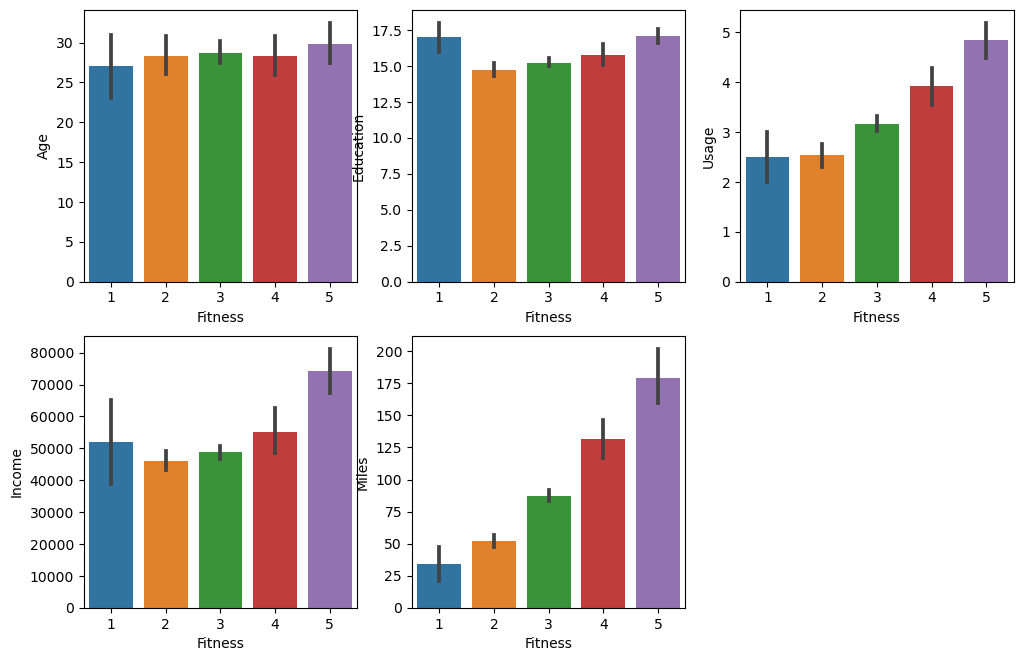

In [15]:
plt.figure(figsize= (12,12))
plt.subplots_adjust()
for i, feature in enumerate(data.drop('Fitness',axis=1).select_dtypes(include= ['int64','float64'])):
    plt.subplot(3,3,i+1)
    sns.barplot(x= data['Fitness'], y= data[feature])

**Insight 1**

**Positive relation with fitness:**

    - Miles (expected to run has a)
    - Usage (Avg. # times the customer wants to use the treadmill every week)
    


In [16]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


<Axes: xlabel='Fitness', ylabel='count'>

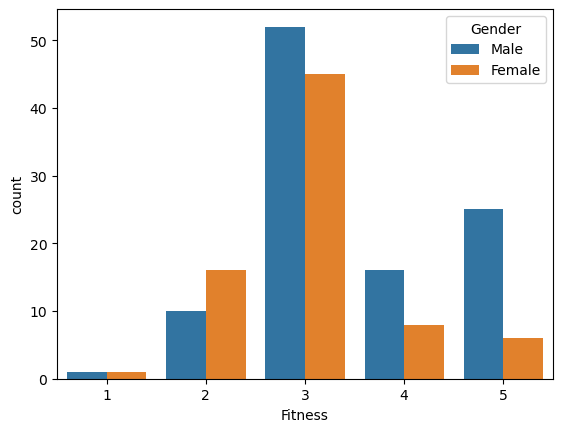

In [31]:
sns.countplot(x= data['Fitness'], hue= data['Gender'])

<Axes: xlabel='Fitness', ylabel='count'>

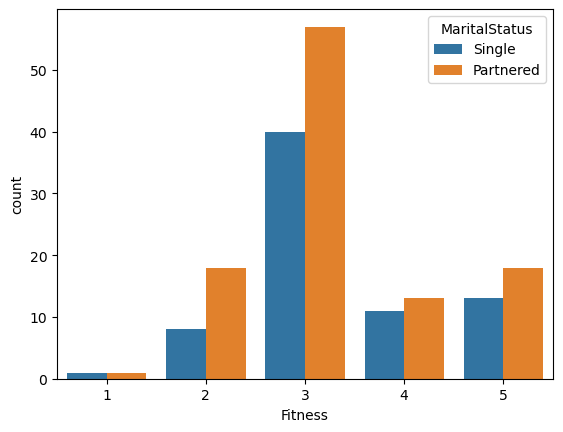

In [32]:
sns.countplot(x= data['Fitness'], hue= data['MaritalStatus'])

#### insight: partnered people are fit compared to single

<Axes: xlabel='Fitness', ylabel='count'>

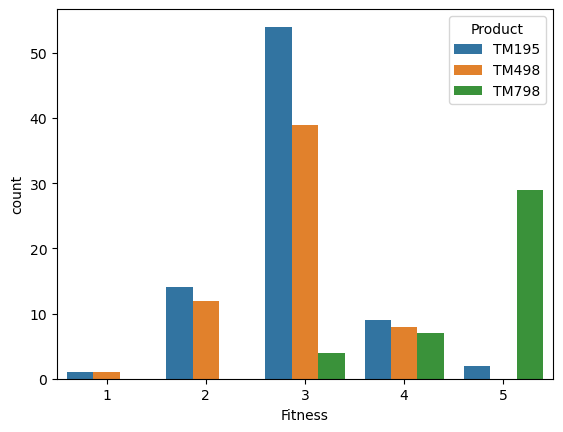

In [33]:
sns.countplot(x= data['Fitness'], hue= data['Product'])

**Insight 2**

**People using product TM798 having more fitness**

<Axes: xlabel='Product', ylabel='count'>

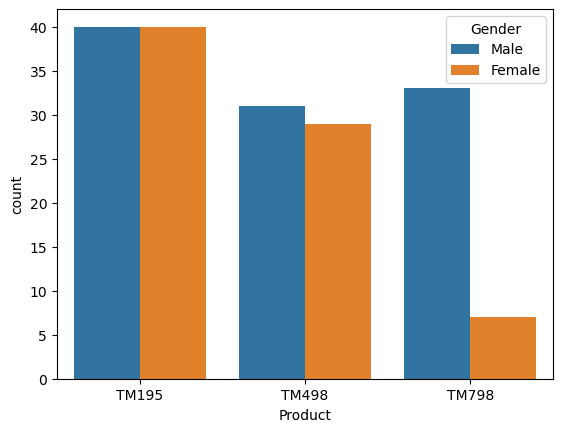

In [37]:
sns.countplot(x= data['Product'], hue= data['Gender'])

**Insight 3**

**Product TM798 is mostly utilized by men**

In [35]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


<Axes: xlabel='Education', ylabel='Income'>

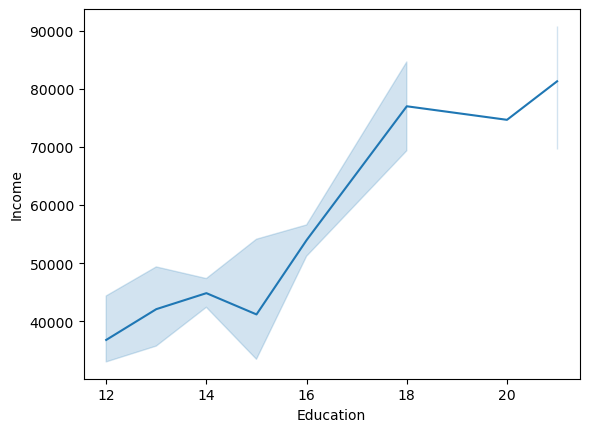

In [46]:
sns.lineplot(x=data['Education'], y= data['Income'])

**Insight 4**

**As the education increases, income is increasing**

<Axes: xlabel='Income', ylabel='Count'>

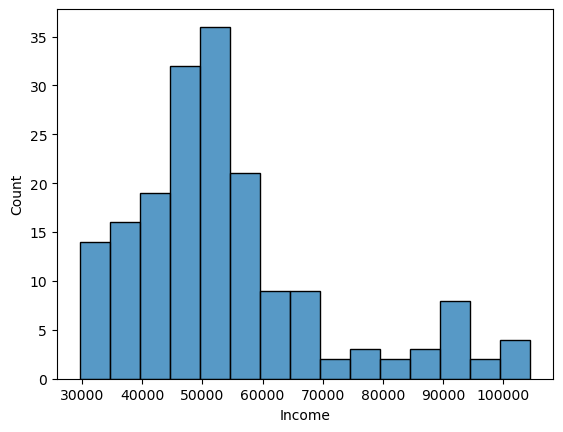

In [50]:
sns.histplot(x= data['Income'])

**Insight 5**

**Majority of the people incomes lies in the range of 45000 to 60000**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


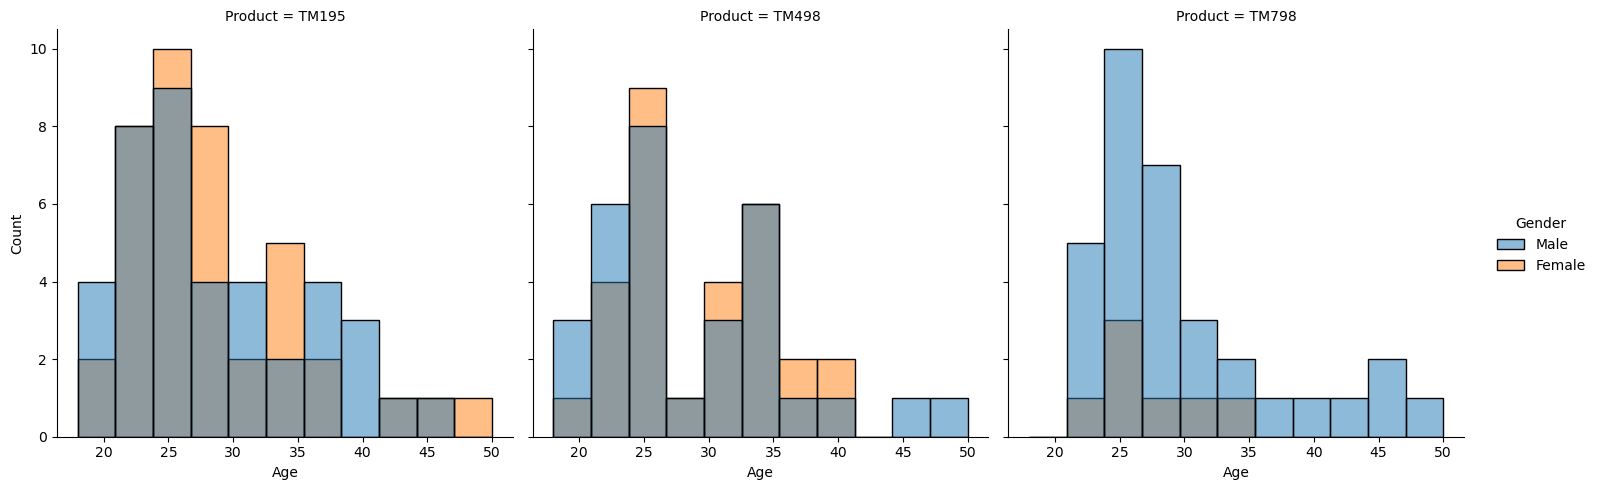

In [55]:
sns.displot(data = data, x = 'Age', col = 'Product', hue= 'Gender')